
# Project X: Integrated AI & Financial Analysis for Industrial 3D Printing

This notebook presents a comprehensive analysis using real-world inspired datasets for:
- Defect Prediction
- Predictive Maintenance
- Job Scheduling Optimization
- Financial Performance Modeling
- Market Topic Trends (NLP)
- Customer Sentiment Analysis
- Lead Scoring with Real Companies

All data are from the file: `ProjectX_Industry_Based_Datasets.xlsx`


## 1. Defect Prediction
**Goal:** Predict print defects using real-time sensor data.  
**Outcome:** AI models can classify defect probability with high accuracy to reduce material wastage and rework.

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

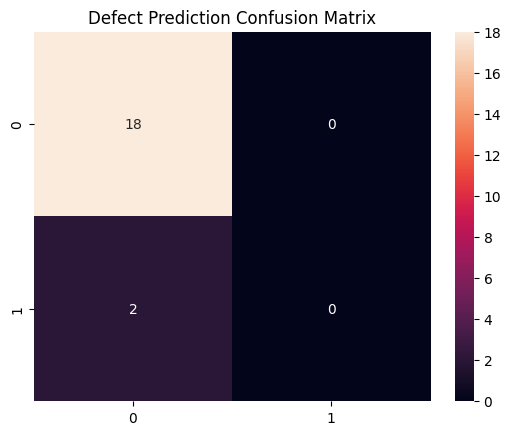

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Defect_Prediction')
X = df.drop("Defect", axis=1)
y = df["Defect"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Defect Prediction Confusion Matrix")
plt.show()


## 2. Predictive Maintenance

**Goal:** Estimate days until machine failure using operational parameters.  
**Outcome:** Accurate regression models can improve maintenance scheduling and reduce downtime.


MAE: 33.40599999999999
RMSE: 38.6543634018205
R^2: -0.29175475710864607


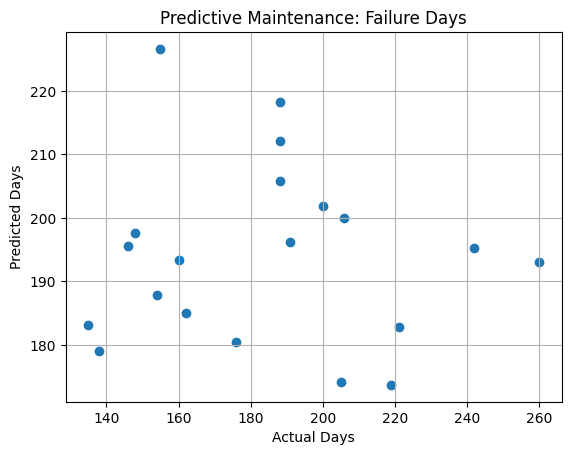

In [ ]:
# Predictive Maintenance: Failure Days Prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Predictive_Maintenance')
X = df.drop("Failure_Days", axis=1)
y = df["Failure_Days"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("R^2:", r2_score(y_test, y_pred))

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Days")
plt.ylabel("Predicted Days")
plt.title("Predictive Maintenance: Failure Days")
plt.grid(True)
plt.show()



## 3. Job Scheduling Optimization

**Goal:** Understand workload distribution and priority patterns.  
**Outcome:** Helps optimize machine utilization and production planning.

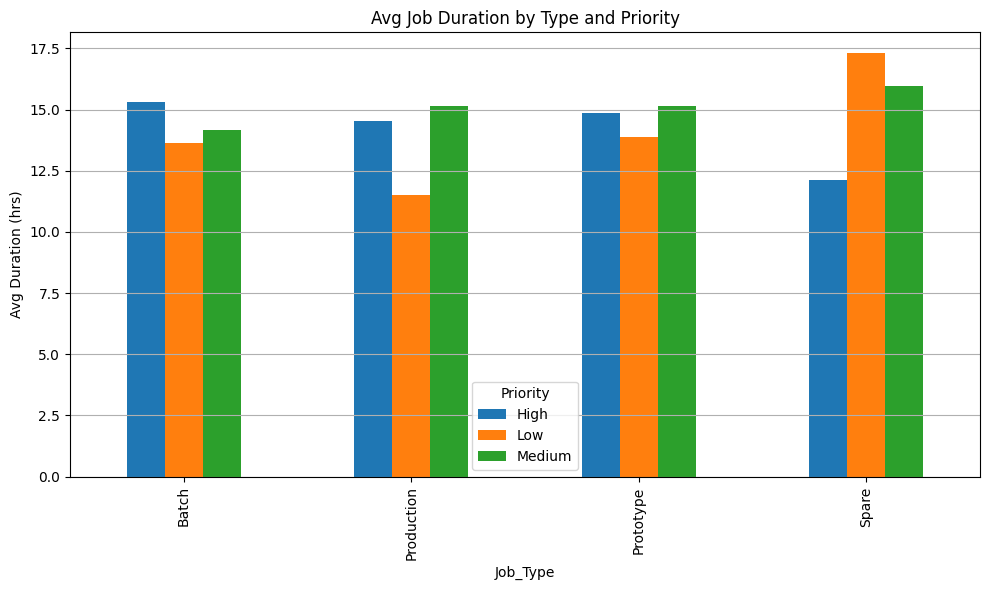

In [8]:

df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Job_Scheduling')

avg_durations = df.groupby(["Job_Type", "Priority"])["Duration_hrs"].mean().unstack()
avg_durations.plot(kind="bar", figsize=(10, 6), title="Avg Job Duration by Type and Priority")
plt.ylabel("Avg Duration (hrs)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 4. Financial Performance Modeling

**Goal:** Analyze CAPEX, OPEX, revenue and net profit across 5 years.  
**Outcome:** Confirms breakeven by Year 3 with healthy projected profit margin.


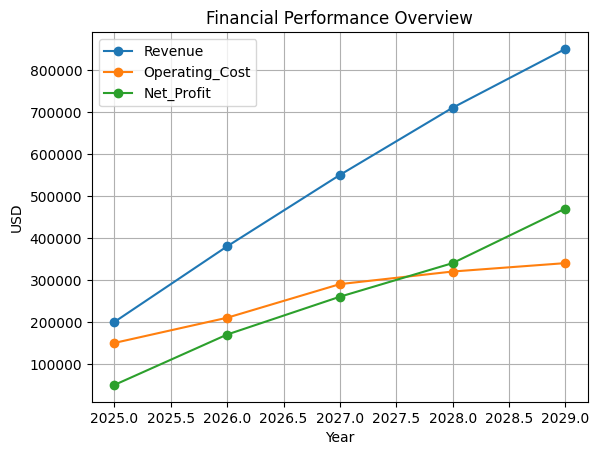

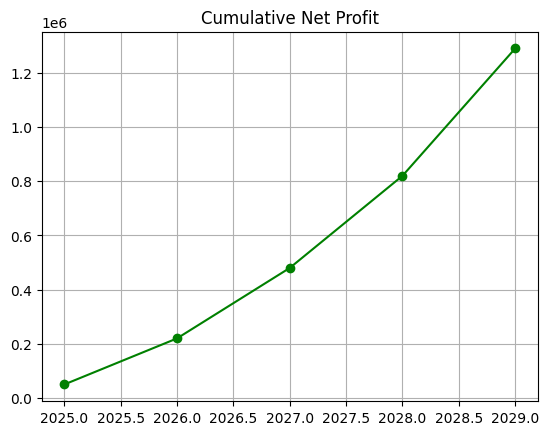

In [9]:

df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Financial_Analysis')

df.plot(x="Year", y=["Revenue", "Operating_Cost", "Net_Profit"], marker="o", title="Financial Performance Overview")
plt.grid(True)
plt.ylabel("USD")
plt.show()

df["Cumulative_Profit"] = df["Net_Profit"].cumsum()
plt.plot(df["Year"], df["Cumulative_Profit"], marker="o", color="green")
plt.title("Cumulative Net Profit")
plt.grid(True)
plt.show()


## 5. Market Topic Modeling (NLP)

**Goal:** Identify themes in industry documents to guide product focus and marketing.  
**Outcome:** Key markets identified include aerospace, medical, tooling, and automotive.


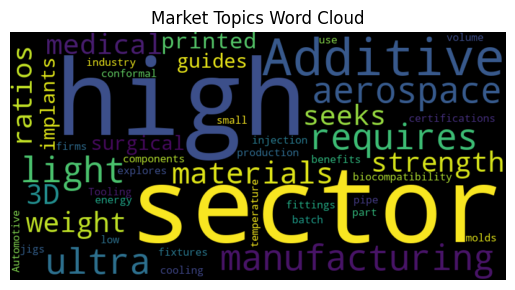

In [10]:

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Market_Topics')
text = " ".join(df["Text"])
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["Text"])
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Market Topics Word Cloud")
plt.show()


## 6. Sentiment Analysis

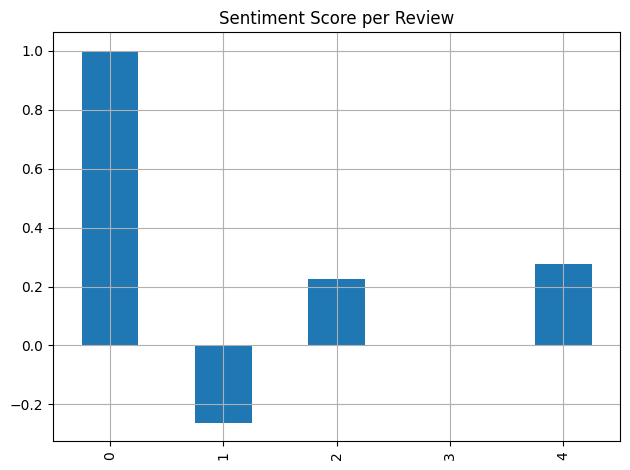

In [11]:

from textblob import TextBlob

df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Sentiment_Reviews')
df["Sentiment"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df.plot(kind="bar", y="Sentiment", title="Sentiment Score per Review", legend=False)
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. Lead Scoring

**Goal:** Rank potential client leads based on budget, urgency, and fit score.  
**Outcome:** Enables efficient sales strategy by targeting high-potential companies.


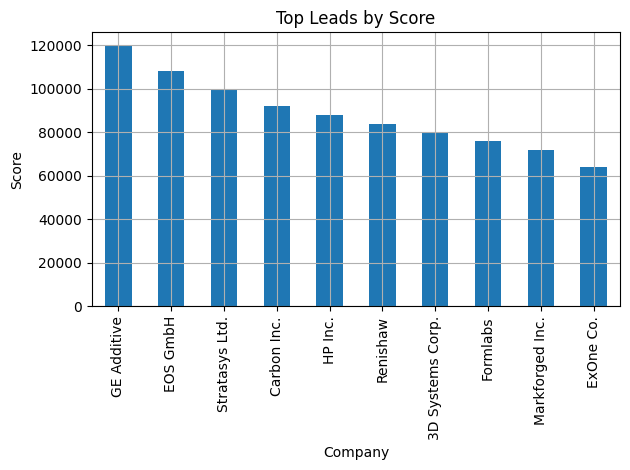

In [12]:

df = pd.read_excel('ProjectX_Industry_Based_Datasets.xlsx', sheet_name='Lead_Scoring')
df["Lead_Score"] = df["Budget"] * 0.4 + df["Urgency"] * 0.3 + df["Fit_Score"] * 0.3
top_leads = df.sort_values(by="Lead_Score", ascending=False)

top_leads.plot(x="Company", y="Lead_Score", kind="bar", title="Top Leads by Score", legend=False)
plt.grid(True)
plt.ylabel("Score")
plt.tight_layout()
plt.show()
